# **Magnetometer Calibration**
##### Designed by **Riccardo Pogliacomi**

Questo software è la prima versione di un software per l'analisi e calibrazione dei magnetometri.
I dati devono essere in **formato CSV**

#### **Import librerie necessarie**
I moduli necessari per questo programma sono pandas (per gestire i file csv) e matplotlib (per stampare i grafici)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#### **Lettura e preparazione dei dati**

In [2]:
df = pd.read_csv("dati.csv")
MagX = df['MagX'].tolist()
MagY = df['MagY'].tolist()
MagZ = df['MagZ'].tolist()

#### **Rappresentazione su grafico scatter**

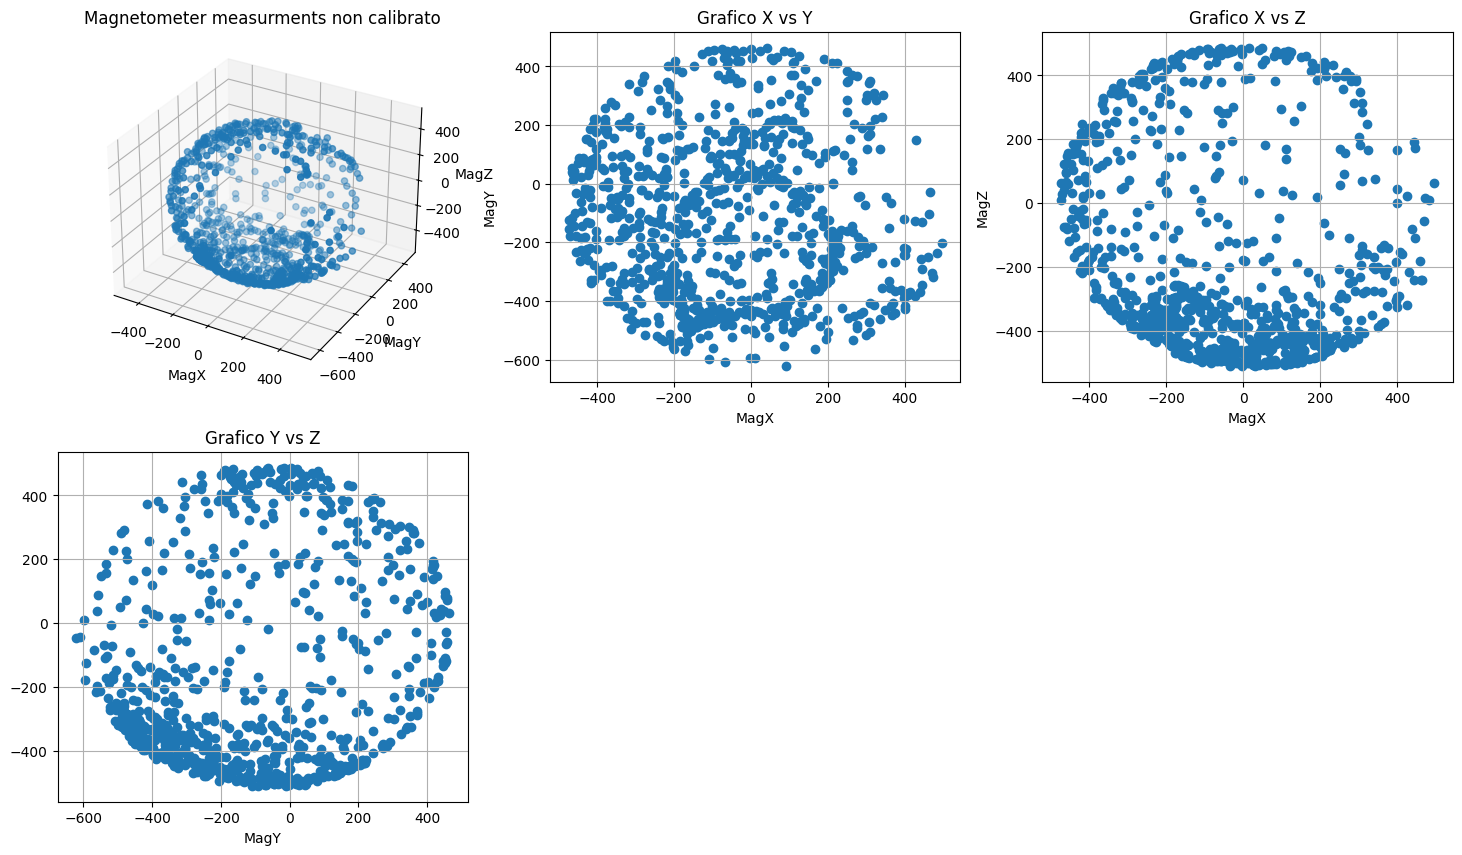

In [3]:
fig = plt.figure(figsize=(18, 10))


ax0 = fig.add_subplot(2,3,1, projection='3d')
ax0.scatter(MagX,MagY,MagZ)

ax0.set_title("Magnetometer measurments non calibrato")
ax0.set_xlabel("MagX")
ax0.set_ylabel("MagY")
ax0.set_zlabel("MagZ")
ax0.grid(True)

# Grafico 2D
ax1 = fig.add_subplot(2, 3, 2)
ax1.scatter(MagX, MagY)
ax1.set_title("Grafico X vs Y")
ax1.set_xlabel("MagX")
ax1.set_ylabel("MagY")
ax1.grid(True)

# Grafico 2D
ax2 = fig.add_subplot(2, 3, 3)
ax2.scatter(MagX, MagZ)
ax2.set_title("Grafico X vs Z")
ax2.set_xlabel("MagX")
ax2.set_ylabel("MagZ")
ax2.grid(True)

# Grafico 2D
ax3 = fig.add_subplot(2, 3, 4)
ax3.scatter(MagY, MagZ)
ax3.set_title("Grafico Y vs Z")
ax3.set_xlabel("MagY")
ax2.set_ylabel("MagZ")
ax3.grid(True)

plt.show()

### **Calibration**

##### **Calcolo degli offset**
Per calcolare dobbiamo trovare i massimi e i minimi

In [4]:
offset_x = (max(MagX) + min(MagX)) / 2
offset_y = (max(MagY) + min(MagY)) / 2
offset_z = (max(MagZ) + min(MagZ)) / 2

print(f"Off X: {offset_x}, Off Y: {offset_y}, Off Z: {offset_z}")

Off X: 11.0, Off Y: -78.5, Off Z: -11.5


##### **Correzione con gli offset calcolati**

In [5]:
MagX_corr = [x - offset_x for x in MagX]        #Sottrae l'offset a tutti i valori della lista
MagY_corr = [y - offset_y for y in MagY] 
MagZ_corr = [z - offset_z for z in MagZ] 

### **Rappresentazione dei risultati nel subplots**

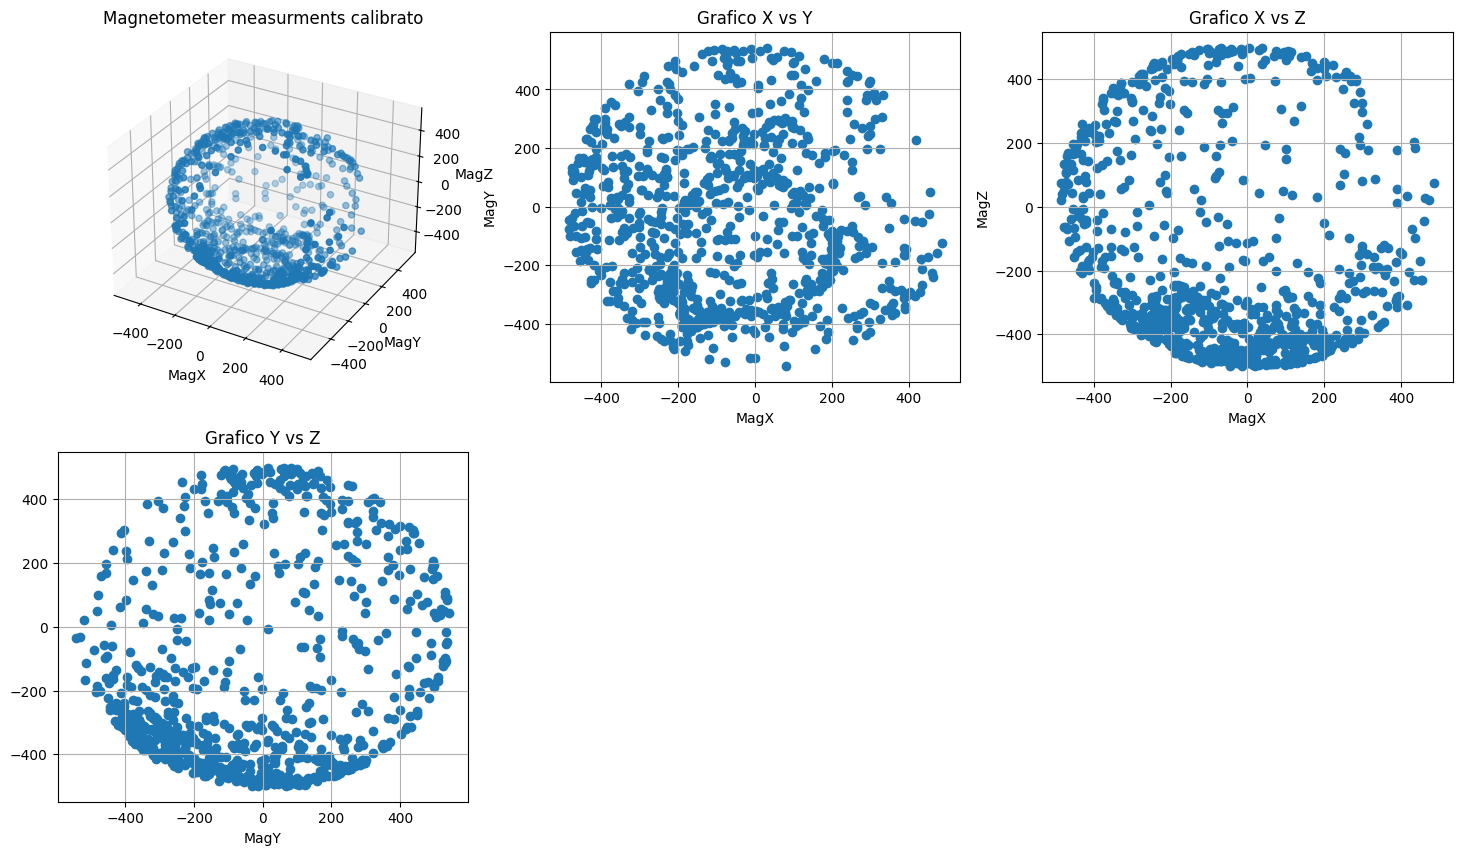

In [6]:
fig = plt.figure(figsize=(18, 10))


ax0 = fig.add_subplot(2,3,1, projection='3d')
ax0.scatter(MagX_corr,MagY_corr,MagZ_corr)

ax0.set_title("Magnetometer measurments calibrato")
ax0.set_xlabel("MagX")
ax0.set_ylabel("MagY")
ax0.set_zlabel("MagZ")
ax0.grid(True)

# Grafico 2D
ax1 = fig.add_subplot(2, 3, 2)
ax1.scatter(MagX_corr, MagY_corr)
ax1.set_title("Grafico X vs Y")
ax1.set_xlabel("MagX")
ax1.set_ylabel("MagY")
ax1.grid(True)

# Grafico 2D
ax2 = fig.add_subplot(2, 3, 3)
ax2.scatter(MagX_corr, MagZ_corr)
ax2.set_title("Grafico X vs Z")
ax2.set_xlabel("MagX")
ax2.set_ylabel("MagZ")
ax2.grid(True)

# Grafico 2D
ax3 = fig.add_subplot(2, 3, 4)
ax3.scatter(MagY_corr, MagZ_corr)
ax3.set_title("Grafico Y vs Z")
ax3.set_xlabel("MagY")
ax2.set_ylabel("MagZ")
ax3.grid(True)

plt.show()